In [ ]:
import matplotlib
from matplotlib.image import imread
from matplotlib import pyplot as plt
import requests

# Preset Matplotlib figure sizes

matplotlib.rcParams['figure.figsize'] = [16, 9]


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
A = tf.constant([
    [10, 8, 20, 0, 0],
    [10, 9, 25, 0, 0],
    [12, 13, 19, 0, 0],
    [10, 8, 20, 0, 0],
    [0, 0, 0, 11, 10],
    [0, 0, 0, 12, 7],
    [0, 0, 0, 9, 8],
    [0, 0, 0, 8, 9]
], dtype=tf.float32)

## SVD with the same rank


Text(0.5, 1.0, 'Bar graph of singular values')

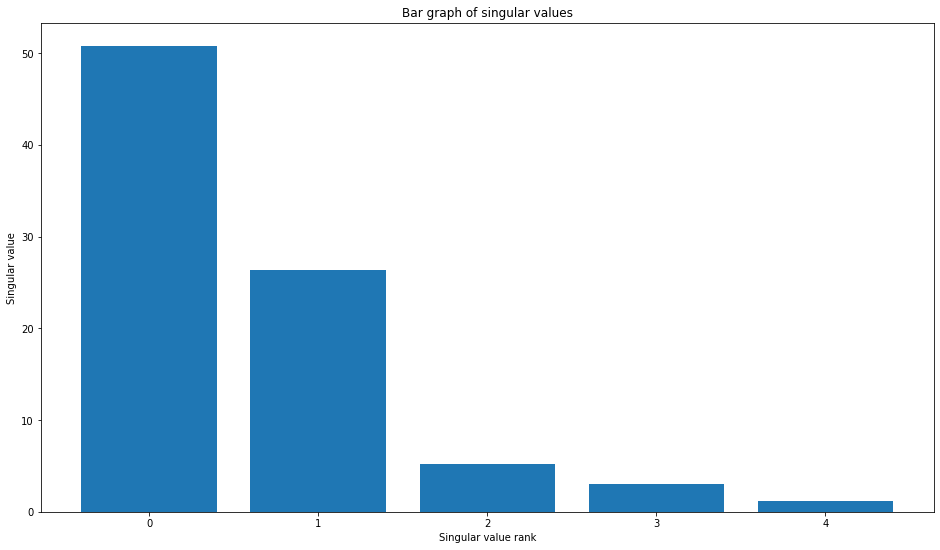

In [ ]:
# Compute the SVD factorization

s, U, V = tf.linalg.svd(A)

# Define Sigma and V Transpose

S = tf.linalg.diag(s)
V_T = tf.transpose(V)

# Reconstruct the original matrix

A_svd = U@S@V_T

# Visualize
plt.bar(range(len(s)), s)
plt.xlabel("Singular value rank")
plt.ylabel("Singular value")
plt.title("Bar graph of singular values")

In [ ]:
A_svd = tf.einsum('s, us, vs -> uv', s, U, V)
print('\nReconstructed Matrix, A_svd', A_svd)


Reconstructed Matrix, A_svd tf.Tensor(
[[ 1.0000001e+01  8.0000019e+00  2.0000006e+01  2.1057104e-13
  -6.5968362e-07]
 [ 1.0000003e+01  9.0000048e+00  2.5000011e+01 -2.1365551e-13
   6.3724991e-07]
 [ 1.2000002e+01  1.3000004e+01  1.9000006e+01 -3.1196644e-14
   9.7503516e-08]
 [ 1.0000002e+01  8.0000029e+00  2.0000008e+01  7.3039949e-14
  -2.2950711e-07]
 [ 1.0807370e-07 -4.1213351e-08  1.1218782e-15  1.1000001e+01
   1.0000003e+01]
 [-3.2995032e-07 -2.6524333e-08  7.6891618e-16  1.2000002e+01
   7.0000019e+00]
 [ 6.8835915e-09 -1.9893243e-08  7.1528883e-16  9.0000010e+00
   8.0000019e+00]
 [ 1.0577917e-07 -3.4582271e-08  9.6228364e-16  7.9999995e+00
   9.0000019e+00]], shape=(8, 5), dtype=float32)


## SVD với bậc nhỏ hơn (Low rank approximation with the SVD)


In [ ]:
s

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([50.791157 , 26.361721 ,  5.1829314,  3.009946 ,  1.181883 ],
      dtype=float32)>

In [ ]:
tf.linalg.diag(s)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[50.791157 ,  0.       ,  0.       ,  0.       ,  0.       ],
       [ 0.       , 26.361721 ,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  5.1829314,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  3.009946 ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  1.181883 ]],
      dtype=float32)>

In [ ]:
def rank_r_approx(s, U, V, r):
  # Compute the matrices necessary for a rank-r approximation

  s_r, U_r, V_r = tf.linalg.diag(s)[:r, :r], U[:, :r], V[:, :r]

  A_r = U_r.numpy()@s_r.numpy()@V_r.numpy().T

  return A_r

In [ ]:
rank_r_approx(s, U, V, 2)

array([[ 9.7897644e+00,  8.8922548e+00,  1.9701759e+01, -3.2509016e-07,
        -2.7405704e-07],
       [ 1.1657083e+01,  1.0588380e+01,  2.3459709e+01,  3.1403488e-07,
         2.6473722e-07],
       [ 1.0560661e+01,  9.5924768e+00,  2.1253178e+01,  4.8049444e-08,
         4.0506574e-08],
       [ 9.7897663e+00,  8.8922567e+00,  1.9701761e+01, -1.1310044e-07,
        -9.5345769e-08],
       [ 1.2023317e-08,  1.0921038e-08,  2.4196749e-08,  1.1358165e+01,
         9.5751438e+00],
       [-6.0261137e-08, -5.4736493e-08, -1.2127467e-07,  1.0464336e+01,
         8.8216305e+00],
       [-1.9039306e-09, -1.7293813e-09, -3.8316323e-09,  9.2034445e+00,
         7.7586746e+00],
       [ 1.2657962e-08,  1.1497500e-08,  2.5473962e-08,  9.1116781e+00,
         7.6813140e+00]], dtype=float32)

In [ ]:
rank_r_approx(s, U, V, 2).shape

(8, 5)

In [ ]:
import numpy as np


In [ ]:
np.linalg.norm(U[:, 0])

1.0000001

In [ ]:
np.linalg.norm(U[:, 1])

1.0

In [ ]:
U[:, 0].numpy().dot(U[:, 1].numpy())

-1.2260952e-09

In [ ]:
V_T[0, :].numpy().dot(V[:, 1].numpy())

0.0